In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
import time

In [92]:
x =[[0.5,0.5, 0.5],[0.5,1.5, 0.5],[1.5,0.5, 0.5],[1.5,1.5, 0.5]]
y=[0,1,1,0]
x = np.asarray(x)
y = np.asarray(y)
x

array([[0.5, 0.5, 0.5],
       [0.5, 1.5, 0.5],
       [1.5, 0.5, 0.5],
       [1.5, 1.5, 0.5]])

In [74]:
# #The commented variables are suggestions so change them as appropriate,
# #However, do not change the __init__(), train(), or predict(x=[]) function headers
# #You may create additional functions as you see fit

# import numpy as np
# #np.random.seed(100)


# # Sigmoid is the activation Function
# def af(t):
#     return 1 / (1 + np.exp(-t))

# def af_derivative(p):
#     return af(p) * (1 -af(p))

# def mse(x, d, w, nLayers, nNodes):
#     c = 0
#     n = len(x)
#     for i in range(0,n):
#         prev = x[i] 
            
#         for j in range(nLayers):
#             u =[]
#             p =[]
#             for k in range(nNodes):
#                 t = np.dot(w[j]['weights'][k], prev)
#                 u.append(t)
#             for l in u:
#                 p.append(af(l))
#             p.append(1)
#             prev = np.asarray(p)
#         y = np.dot(w[nLayers]["weights"][0], prev)
#         c += (d[i] - y)**2
            
#     return c/n

# #np.random.seed(100)
# class NeuralNetwork:
    
#     def __init__(self,x=[],y=[],numLayers=2,numNodes=2, numOutputs = 1, eta=0.001,maxIter=10000, ep = 0):
#         #self.data = x
#         self.labels = y
#         self.nLayers = numLayers
#         self.nNodes = numNodes
#         self.numOutputs = numOutputs
#         self.eta = eta
#         self.maxIt = maxIter
#         self.ep = ep
#         #self.train()
#         #self.g = len(self.data[0])*numLayers + numLayers*numNodes + numNodes*numOutputs
#         newdata = []
#         for i in range(len(x)):
#             newdata.append(np.append(x[i],1))     
#         self.data = newdata
#         self.weights = [{"weights":np.random.rand(self.nNodes, len(self.data[0]))}] #create the weights from the inputs to the first layer
#         for i in range(self.nLayers):
#             self.weights.append({"weights":np.random.rand(self.nNodes,self.nNodes+1)}) #create the random weights between internal layers
            
#         if self.nLayers > 0:
            
#             self.weights.append({"weights":np.random.rand(self.numOutputs,self.nNodes+1)}) #create weights from final layer to output node
#         #return self.weights
        
        
#     def train(self):
        

#         print(self.data)
# #         #temp_weights = self.weight_initialization()
# #         print(self.weights)
#         temp_eta = self.eta
# #         temp2 = mse(self.data, self.labels, self.weights, self.nLayers + 1, self.nNodes)
# #         print(temp2)
# #         print(f) 
#         e = 0
#         obj =[]
#         epoch = []

#         cos = 100000000
# #         #epd = 10000000
#         while cos >= 0.05:
#             #print(cos)
#             prev = cos
#             for i in range(len(self.data)):
#                 #print(i)
#                 self.backprop(self.labels[i], self.data[i]) 
#                 for m in range(len(self.weights)):
#                     for j in range(len(self.weights[m]['weights'])):
#                         for k in range(len(self.weights[m]['weights'][j])):
#                             self.weights[m]['weights'][j][k] -= self.eta *self.weights[m]['g'][j][k]
# #                 print('\n')
# #                 print(self.weights)
# #                 print(f)


#             cos = mse(self.data, self.labels, self.weights, self.nLayers + 1,self.nNodes)
# #             epoch.append(e)
# #             obj.append(cos)
# #             e += 1

#             if cos > prev:
#                 self.eta = 0.9*self.eta
#                 obj =[]
#                 epoch = []
#                 e = 0
#                 cos = 100000000
# #                 self.weights = temp_weights
# #                 print(temp_weights)
                
#                 if self.eta <= 0.00001:                    
#                     self.eta = temp_eta  
# #                     obj =[]
# #                     epoch = []
# #                     e = 0
# #                     cos = 100000000
#                     self.weights = [{"weights":np.random.rand(self.nNodes, len(self.data[0]))}]
#                     for i in range(self.nLayers):
#                         self.weights.append({"weights":np.random.rand(self.nNodes,self.nNodes+1)})
#                     if self.nLayers >= 0:
#                         self.weights.append({"weights":np.random.rand(self.numOutputs,self.nNodes+1)})                    
#             elif cos <= prev:
#                 epoch.append(e)
#                 obj.append(cos)
#                 e += 1
#                 #print(g)
#         #print(self.weights)
#         return self.weights   
       

#     def predict(self,x=[]):
#         prev = x
#         for j in range(self.nLayers):
#             l = []
#             s = []
#             for m in range(self.nNodes):
#                 s.append(np.matmul(self.weights[j]["weights"][m], prev))
#             for k in s:
#                 l.append(af(k))
#             l.append(1)
#             prev = np.asarray(l)
        
#         s =[]
#         p = np.matmul(self.weights[self.nLayers + 1]["weights"][0], prev)
#         s.append(p)
#         q = af(p)
#         return q
        
#     def feedforward(self, data):
#         r =[]
#         prev = data
#         r.append(prev)
#         t =[]

#         for j in range(self.nLayers):
#             l = []
#             s = []
#             for m in range(self.nNodes):
#                 #print(self.weights[j]["weights"][m])
#                 s.append(np.dot(self.weights[j]["weights"][m], prev))
            
#             for k in s:
#                 l.append(af(k))
#             l.append(1)
#             prev = np.asarray(l)
#             t.append(s)
#             r.append(l)
            
#         s =[]
#         p = np.dot(self.weights[self.nLayers + 1]["weights"][0], l)
#         s.append(p)
#         q = af(p)
#         t.append(s)        
        
#         return t,r, q

#     def backprop(self, d, data):
#         der = []
#         t,r, q= self.feedforward(data)
# #         print('\n')
# #         print("t = " + str(t))
# #         print('\n')
# #         print('r = ' + str(r))  
#         #q = self.predict(data)
        
#         for i in range(self.nLayers):
#             a =[]
#             for m in range(self.nNodes):
#                 a.append(af_derivative(t[i][m]))
#             der.append(a)
        
#         diff = []
#         s =[]
#         s.append(af_derivative(t[self.nLayers][0]))
#         diff.append(d - q)
#         der.append(s)
#         for i in reversed(range(len(self.weights))):
#             layer = self.weights[i]
#             errors = []
#             if i != len(self.weights)-1:
#                 for j in range(len(layer['weights'])):
#                     error = 0
                    
#                     for k in range(len(self.weights[i + 1]['weights'])):
#                         error += (self.weights[i + 1]['weights'][k][j] * self.weights[i + 1]['s'][k])
#                     errors.append(error)
#             else:
#                 errors.append(diff[0])
#             layer['s'] = []
#             for j in range(len(layer['weights'])):
#                 layer['s'].append(errors[j]*der[i][j])
# #         print('\n')
#         #print(weights)
#         #print(f)
#         for j in range(len(self.weights)):
#             layer = self.weights[j]
#             layer['g'] = []
#             for k in range(len(self.weights[j]['weights'])):
#                 s =[]
#                 for m in range(len(self.weights[j]['weights'][k])):
#                     s.append(((-(r[j][m])*self.weights[j]['s'][k])*2)/len(self.data))
#                 layer['g'].append(s)

#         return 0.0

In [77]:
import numpy as np
np.random.seed(100)


# # Rectified linear Unit Activation Function
# def af(t):
#     if t >= 0: 
#         return t
#     else:
#         return 0

# # Its derivative
# def af_derivative(p):
#     if p >= 0:
#         return 1
#     else:
#         return 0

# Sigmoid is the activation Function
def af(t):
    return 1 / (1 + np.exp(-t))

def af_derivative(p):
    return p * (1 -p)

# def decision(x):
#     if x >= 0.5:
#         return 1
#     else:
#         return 0
    
def mse_misclassifications(x, d, w, nLayers, nNodes):
    c = 0
    count = 0
    n = len(x)
    for i in range(0,n):
        prev = x[i]             
        for j in range(nLayers):
            u =[]
            p =[]
            for k in range(nNodes):
                t = np.dot(w[j]['weights'][k], prev)
                u.append(t)
            for l in u:
                p.append(af(l))
            #p.append(1)
            prev = np.asarray(p)

        
        y = af(np.dot(w[nLayers]["weights"][0], prev))
        if np.any(d[i] - y):
            count += 1

        c += np.linalg.norm(d[i] - y)**2      

    return c/n, count



#np.random.seed(100)
class NeuralNetwork:
    
    def __init__(self,x=[],y=[],numLayers=2,numNodes=2, numOutputs = 1, eta=0.001,maxIter=10000, prec = 0):
        self.data = x
        self.labels = y
        self.nLayers = numLayers
        self.nNodes = numNodes
        self.numOutputs = numOutputs
        self.eta = eta
        self.temp_eta = eta
        self.maxIt = maxIter
        self.prec = prec
        #self.train()
        #self.g = len(self.data[0])*numLayers + numLayers*numNodes + numNodes*numOutputs
#         newdata = []
#         for i in range(len(x)):
#             newdata.append(np.append(x[i],1))     
#         self.data = newdata
        self.weights = [{"weights":np.random.uniform(low =-1, high = 1, size = (self.nNodes, len(self.data[0])))}] 
        for i in range(self.nLayers):
            self.weights.append({"weights":np.random.uniform(low =-1, high = 1, size = (self.nNodes,self.nNodes))})             
        if self.nLayers >= 0:            
            self.weights.append({"weights":np.random.uniform(low =-1, high = 1, size = (self.numOutputs,self.nNodes))})
        self.temp_weights = self.weights
         
        
    def train(self):
        print(self.weights)
#         return self.weights
        #print(self.weights[0]['weights'][0])
        
        temp_weights = self.weights
        temp_eta = self.temp_eta
        temp2, temp3 = mse_misclassifications(self.data, self.labels, self.weights, self.nLayers + 1, self.nNodes)
        e = 0
        obj =[]
        epoch = []
        mis = []
        obj.append(temp2)
        mis.append(temp3)
        cos = 100000000
#         while e < self.maxIt:
#             #print("K")
        while e <= self.maxIt:
            e += 1
            prev = cos

            i = 0
            while i < len(self.data):
                #print(i)
                #print(len(self.data[i]))
                self.backprop(self.labels[i], self.data[i]) 
                for m in range(len(self.weights)):
                    for j in range(len(self.weights[m]['weights'])):
                        for k in range(len(self.weights[m]['weights'][j])):
                            self.weights[m]['weights'][j][k] += self.eta *self.weights[m]['g'][j][k]
                
                i += 1
#             print(self.weights)
#             print(f)

            cos, misc = mse_misclassifications(self.data, self.labels, self.weights, self.nLayers + 1,self.nNodes)            
            epoch.append(e)
            obj.append(cos)
            mis.append(misc)
#             e += 1

#             if cos > prev:
#                 self.eta = 0.9*self.eta
#                 obj =[]
#                 epoch = []
#                 e = 0
#                 cos = 100000000
# #                 self.weights = temp_weights
# #                 print(temp_weights)
                
#                 if self.eta <= 0.00001:                    
#                     self.eta = temp_eta  
# #                     obj =[]
# #                     epoch = []
# #                     e = 0
# #                     cos = 100000000
#                     self.weights = [{"weights":np.random.uniform(low =-1, high = 1, size = (self.nNodes, len(self.data[0])))}] 
#                     for i in range(self.nLayers):
#                         self.weights.append({"weights":np.random.uniform(low =-1, high = 1, size = (self.nNodes,self.nNodes+1))})             
#                     if self.nLayers >= 0:            
#                         self.weights.append({"weights":np.random.uniform(low =-1, high = 1, size = (self.numOutputs,self.nNodes+1))})
                     
#             elif cos <= prev:
#                 epoch.append(e)
#                 obj.append(cos)
#                 e += 1
#                 #print(g)
        print(self.weights)
        return self.weights, obj, epoch, mis   
       

    def feedforward(self,x=[]):
        #print(x)
        prev = x
        r =[]      
        r.append(prev)
        t =[]
        for j in range(self.nLayers + 1):
            l = []
            s = []
            for m in range(self.nNodes):
                #print(self.weights[j]["weights"][m])
                s.append(np.matmul(self.weights[j]["weights"][m], prev)) 
            for k in s:
                l.append(af(k))
            #l.append(1)
            prev = np.asarray(l)
            t.append(s)
            r.append(l)
            
        s =[]
        for i in range(self.numOutputs):
            
            p = np.matmul(self.weights[self.nLayers + 1]["weights"][i], l)
            s.append(af(p))
        t.append(s)              
        return t,r        

    def backprop(self, d, data):
        der = []  
        
        t,r = self.feedforward(data)
#         print('\n')
#         print("t = " + str(t))
#         print(f)
#         print('\n')
#         print('r = ' + str(r))
        
        for i in range(self.nLayers + 1):
            a =[]
            for m in range(self.nNodes):
                a.append(af_derivative(t[i][m]))
            der.append(a)

#         print(t[self.nLayers + 1])
        diff = d - t[self.nLayers + 1][0]
#         print(diff)
#         print(f)


        s =[]
        for k in range(self.numOutputs):
            s.append(af_derivative(t[self.nLayers + 1][k]))

        der.append(s)
    
        for i in reversed(range(len(self.weights))):
            layer = self.weights[i]
            errors = []
            if i != len(self.weights)-1:
                for j in range(len(layer['weights'])):
                    error = 0
                    
                    for k in range(len(self.weights[i + 1]['weights'])):
                        #print(self.weights[i + 1]['s'][k])

                        error += (self.weights[i + 1]['weights'][k][j] * self.weights[i + 1]['s'][k])
                    errors.append(error)

                layer['s'] = []
                for j in range(len(layer['weights'])):
                    layer['s'].append(errors[j]*der[i][j])
            else:
                errors.append(diff)

                layer['s'] = []
                for j in range(len(layer['weights'])):
#                     print(diff)
#                     print(errors[0][j])
#                     print(der[i][j])
#                     print(f)
                    layer['s'].append(errors[j]*der[i][j])




# Finding the corresponding gradient vector
                

        for j in range(len(self.weights)):
            layer = self.weights[j]
            layer['g'] = []
            for k in range(len(self.weights[j]['weights'])):
                s =[]
                for m in range(len(self.weights[j]['weights'][k])):
                    print(self.weights[j]['s'][k])
                    print(r[j])
                    print(f)
                    s.append((((r[j][m])*self.weights[j]['s'][k])*2)/len(self.data))
                layer['g'].append(s)

        print(self.weights)
        print(f)

        return 0.0



nLayers = 0
nNodes = 2
nOut = 1
eta = 1
iter = 10000
prec = 0.05

w= NeuralNetwork(x,y, nLayers, nNodes, nOut, eta, iter, prec).train()
w

[{'weights': array([[ 0.08680988, -0.44326123, -0.15096482],
       [ 0.68955226, -0.99056229, -0.75686176]])}, {'weights': array([[0.34149817, 0.65170551]])}]
0.01559470829530992
[0.5 0.5 0.5]


NameError: name 'f' is not defined

In [76]:
weights =[]
for i in range(len(w)):
    weights.append(w[i]['weights'])

weights = np.asarray(weights)
weights

array([array([[ 0.08680988, -0.44326123, -0.15096482],
       [ 0.68955226, -0.99056229, -0.75686176]]),
       array([[0.34149817, 0.65170551]])], dtype=object)

In [110]:
class Neural_Network():
    
    def __init__(self, x=[[]], y=[], nHiddenLayers = 0, nHiddenNodes =0, numOutputs = 0, eta = 1, iter = 0, prec = 0):
        self.data = x
        self.labels = y
        self.nInputNodes = x.shape[1]
        self.nHiddenLayers = nHiddenLayers
        self.nHiddenNodes = nHiddenNodes
        self.numOutputs = numOutputs
        self.eta = eta
        self.maxIt = iter
        self.prec = prec


        self.weights=[np.random.uniform(low = -1, high = 1, size = (self.nHiddenNodes, self.nInputNodes))]
        for i in range(self.nHiddenLayers-1):
            self.weights.append(np.random.uniform(low =-1, high = 1, size =(self.nHiddenNodes, self.nHiddenNodes))) 
        self.weights.append(np.random.uniform(low =-1, high = 1, size = (self.numOutputs, self.nHiddenNodes)))

        # Sigmoid activation function

    def sigmoid(self, s):      
        return 1/(1+np.exp(-s))

    #derivative of sigmoid
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def af(self,s):
        return 1/(1+np.exp(-s))
    
    def af_derivative(self,s):
        return s * (1 - s)
        
    
#     def decision_A(self,x):
#         out =[]
# #         print(x.shape)
# #         print(f)
#         for i in range(x.shape[0]):
#             s =np.zeros(x.shape[1])
            
            
#             max = np.argmax(x[i])
#             #print(max)

#             s[max] = 1
#             out.append(s)
#         out = np.asarray(out)
#         print(out.shape)
#         print(f)
#         return out

    def misclassifications(self, x,y):
        count = 0
        for i in range(y.shape[0]): 
            if np.any(x[i]-y[i]):
                count += 1
                
        return count
    
    def predict(self):
        prev = self.data.T
        for i in range(len(self.weights)-1):
            temp = (np.matmul(self.weights[i], prev))
            temp2 = self.sigmoid(temp)
            prev = temp2

        temp_f = np.matmul(self.weights[self.nHiddenLayers], prev)
        temp4 = self.af(np.transpose(temp_f)) 
        return temp4[:,0]
    
    def feedforward(self, x):
#         print(x)
        self.r = []
        self.r.append(x)
#         print(self.r)
#         print(f)
        prev = x.T
        
        for i in range(len(self.weights)-1):
#             print(self.weights[i])
#             print(prev)
            temp = np.matmul(self.weights[i], prev)
#             print(temp)
            temp2 = self.sigmoid(temp)
#             print(temp2)
            self.r.append(temp2)
#             print(self.r)
#             print('\n')
            prev = temp2
            
#         print(self.weights[self.nHiddenLayers])
#         print(prev)
        temp_f = np.matmul(self.weights[self.nHiddenLayers], prev)


        temp4 =self.af(temp_f.T)
        return temp4[0][0]

    def backward(self, x, y):
        self.delta = []
        self.gradient=[]
#         print(x)
#         print(y)
#         print(f)
        o = self.feedforward(x)
#         print(o)

        self.out_error = y - o
#         print(self.out_error)
#         print(f)


        for i in reversed(range(len(self.weights))):
            if i == 0 and i != len(self.weights)-1:
#                 print(temp)
#                 print(self.weights[i+1].T)
                temp2 = self.weights[i+1].T.dot(temp)
#                 print(temp2)

#                 print(self.sigmoidPrime(self.r[i+1]))

                temp3 = temp2*self.sigmoidPrime(self.r[i+1])
#                 print(temp3)

                temp4 = (temp3.dot(x))*2/len(self.data)
#                 print(temp4)
#                 print('w')
#                 print(self.weights[i])
#                 print((self.eta*temp4*2)/len(self.data))
                self.gradient.append(temp4)
#                 print(temp4)
#                 print(f)
#                 print(self.weights[i])
                temp = temp3
                self.delta.append(temp3)
                    
            elif i > 0 and i<len(self.weights)-1:
                temp2 = self.weights[i+1].T.dot(temp) 
                temp3 = temp2*self.sigmoidPrime(self.r[i+1])
                temp4 = (temp3.dot(self.r[i].T))*2/len(self.data)
                temp = temp3
                self.delta.append(temp3)
                self.gradient.append(temp4)


                    
            elif i == len(self.weights)-1:
#                 print(self.out_error)
#                 print(self.af_derivative(o))
#                 print(f)
                temp = self.out_error*self.af_derivative(o)

#                 print(self.weights[i])

#                 print(self.r[i].T)
                temp2 = (temp*self.r[i].T)*2/len(self.data)
                self.delta.append(temp)
#                 print(temp2)
#                 print((self.eta*temp2*2)/len(self.data))
                self.gradient.append(temp2)
#                 print(self.weights[i])
#                 print('\n')

        self.gradient = self.gradient[::-1]
#         print(self.weights[1]+self.gradient[1])
#         print(f)
        for i in range(len(self.weights)):
            self.weights[i] += self.gradient[i]
#         print(self.weights)
#         print(f)

            

                


    def train (self):
        #print(self.eta)
        print(self.weights)
        e = 0
        obj =[]
        epoch = []
        mis = []
        epoch.append(e)
        pred = self.predict()
        obj.append(((np.linalg.norm(self.labels - pred))**2)/len(self.data))
        mis.append(self.misclassifications(self.labels, pred))
        mse = 100000000000
        while e <= self.maxIt: 
            prev = mse
#             print(prev)
#             print(f)
            e += 1
            for i in range(len(self.data)):                
                self.backward(self.data[i].reshape(1,self.nInputNodes), self.labels[i])
#                 print(self.delta)
#                 print(f)
#             print(self.weights)
#             print(f)
                
#             print('after')
#             print(self.weights)
            pred = self.predict()

            mse = ((np.linalg.norm(self.labels - pred))**2)/len(self.data)
#             print(mse)
#             print(f)

            
            obj.append(mse)
            epoch.append(e)
            mis.append(self.misclassifications(self.labels, pred))
            if mse >= prev:
                self.eta = 0.8*self.eta
            prev = mse
        print(self.weights)
        return self.weights, epoch, obj, mis
    



In [111]:
nHiddenLayers = 1
nHiddenNodes =2
numOutputs = 1
eta = 1
iter = 10000
prec = 0.5
#print(xtrain.shape)
NN = Neural_Network(x, y, nHiddenLayers, nHiddenNodes, numOutputs, eta, iter, prec)

w, epoch, obj, mis = NN.train()

[array([[-0.652784  ,  0.93321939,  0.9140252 ],
       [ 0.19594737,  0.46260151, -0.31922955]]), array([[-0.81588879, -0.07300396]])]
[array([[-8.11621696, 10.40447321,  4.69905392],
       [-1.50947251,  1.56372164, -0.39740538]]), array([[-12.66107405,  19.65183669]])]


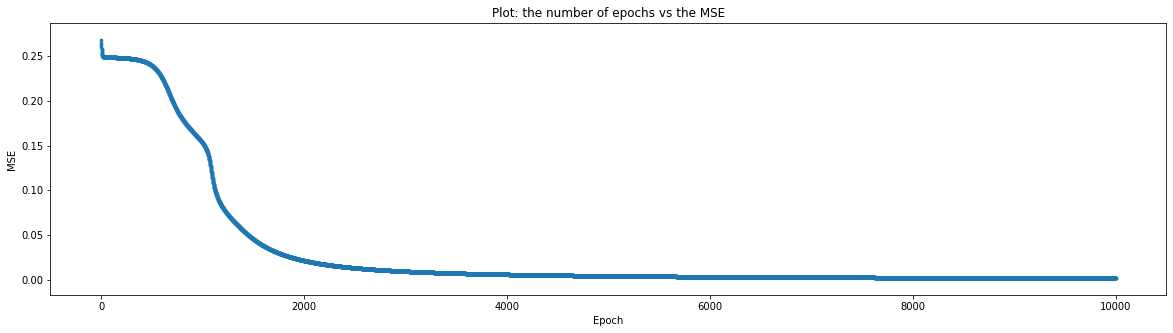

In [112]:

fig, ax = plt.subplots(figsize = (20,5))
plt.scatter(epoch,obj, s  = 7)
plt.plot(epoch,obj)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title('Plot: the number of epochs vs the MSE')
plt.show()

In [59]:
0.24601978*0.04902827

0.012061924199180599

In [284]:
0.14644149137233592*0.34149817

0.0500095013157235

In [114]:
newdata = []
for i in range(len(x)):
    newdata.append(np.append(x[i],1))     
cos, mis = mse_misclassifications(newdata, y, w, 1,2)
cos

ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)

In [83]:
def predict(x,w):
        #Do not change this function header
        #print('\n')
        #print("Predict Function")
#     newdata = []
#     for i in range(len(x)):
#         newdata.append(np.append(x[i],1))
#     newdata = np.asarray(newdata)
    prev = np.append(x,1)
    for j in range(nLayers):
        #print(prev)
        l = []
        s = []
        for m in range(nNodes):
            #print(w[j]["weights"][m])
            s.append(np.matmul(w[j]["weights"][m], prev))
        for k in s:
            l.append(af(k))
        l.append(1)
        prev = np.asarray(l)
    s =[]
    for n in range(nOut):

        p = np.dot(prev,w[nLayers]["weights"][n])
        s.append(p)
    q = []
    for i in range(len(s)):
        q.append(af(s[i]))
    return q

In [84]:
p= predict([0.5,0.5, 0.5], w)
p

[0.10566471984298263]

In [33]:
af(0.0877)

0.5219109581721073

In [34]:
af_derivative(0.076)

0.24963934723851425

In [35]:
weights =[]
for j in range(len(w)):
    for k in range(len(w[j]['weights'])):
        for m in range(len(w[j]['weights'][k])):
            weights.append(w[j]['weights'][k][m])

weights

[0.15617815132940527,
 0.39930187620131075,
 0.41335189442217146,
 0.6881133459690951,
 0.41195037138254215,
 0.8430785393983047,
 0.8361466071009599,
 0.048627368891770384,
 0.16861064580142782,
 0.8434798365239617,
 -0.12957839763614887]

In [40]:
newdata = []
for i in range(len(x)):
    newdata.append(np.append(x[i],1))
p = []
for i in newdata:
    p.append(predict(i,w))
p

[[0.6527358278270062],
 [0.678587063732908],
 [0.6668809008516015],
 [0.6864532238463801]]

In [12]:
a = np.transpose(np.mat([[0,1,2],[3,4,5]]))
print(a.shape)
b = np.mat([0,1,2])
print(b.shape)
np.matmul(b,a)

(3, 2)
(1, 3)


matrix([[ 5, 14]])

In [15]:
import numpy as numpy

In [16]:
sum(numpy.array([1,3,4]) < numpy.array([4,6,3]))

2

In [ ]:
# #The commented variables are suggestions so change them as appropriate,
# #However, do not change the __init__(), train(), or predict(x=[]) function headers
# #You may create additional functions as you see fit


# np.random.seed(100)


# # Sigmoid is the activation Function
# def af(t):
#     return 1 / (1 + np.exp(-t))

# def af_derivative(p):
#     return af(p) * (1 -af(p))

# def mse(x, d, w, nLayers, nNodes):
#     c = 0
#     n = len(x)
#     for i in range(0,n):
#         prev = x[i] 
            
#         for j in range(nLayers):
#             u =[]
#             p =[]
#             for k in range(nNodes):
#                 t = np.dot(w[j]['weights'][k], prev)
#                 u.append(t)
#             for l in u:
#                 p.append(af(l))
#             p.append(1)
#             prev = np.asarray(p)
#         y = np.dot(w[nLayers]["weights"][0], prev)
#         y = af(y)
#         c += (d[i] - y)**2
            
#     return c/n

# #np.random.seed(100)
# class NeuralNetwork:
    
#     def __init__(self,x=[],y=[],numLayers=2,numNodes=2, numOutputs = 1, eta=0.001,maxIter=10000, ep = 0):
#         self.labels = y
#         self.nLayers = numLayers
#         self.nNodes = numNodes
#         self.numOutputs = numOutputs
#         self.eta = eta
#         self.maxIt = maxIter
#         self.ep = ep
#         #self.train()
#         #self.g = len(self.data[0])*numLayers + numLayers*numNodes + numNodes*numOutputs
#         newdata = []
#         for i in range(len(x)):
#             newdata.append(np.append(x[i],1))     
#         self.data = newdata
#         self.weights = [{"weights":np.random.rand(self.nNodes, len(self.data[0]))}] #create the weights from the inputs to the first layer
#         for i in range(self.nLayers-1):
#             self.weights.append({"weights":np.random.rand(self.nNodes,self.nNodes+1)}) #create the random weights between internal layers
            
#         if self.nLayers > 0:
            
#             self.weights.append({"weights":np.random.rand(self.numOutputs,self.nNodes+1)}) #create weights from final layer to output node
#         #return self.weights
        
        
#     def train(self):
        

#         print(self.data)
#         #temp_weights = self.weight_initialization()
#         print(self.weights)
#         temp_eta = self.eta
#         temp2 = mse(self.data, self.labels, self.weights, self.nLayers, self.nNodes)
#         print(temp2)
# #         print(f) 
#         e = 0
#         obj =[]
#         epoch = []
# #         epoch.append(e)
# #         obj.append(temp2)
#         cos = 100000000
# #         #epd = 10000000
# #         while e < self.maxIt:
#         while cos >= 0.1:
#             #print(cos)
#             prev = cos
#             for i in range(len(self.data)):
#                 #print(i)
#                 self.backprop(self.labels[i], self.data[i]) 
#                 for m in range(len(self.weights)):
#                     for j in range(len(self.weights[m]['weights'])):
#                         for k in range(len(self.weights[m]['weights'][j])):
#                             self.weights[m]['weights'][j][k] -= self.eta *self.weights[m]['g'][j][k]

#             cos = mse(self.data, self.labels, self.weights, self.nLayers,self.nNodes)
# #             epoch.append(e)
# #             obj.append(cos)
# #             e += 1

#             if cos > prev:
#                 self.eta = 0.9*self.eta
#                 obj =[]
#                 epoch = []
#                 e = 0
#                 cos = 100000000
# #                 self.weights = temp_weights
# #                 print(temp_weights)
                
#                 if self.eta <= 0.00001:                    
#                     self.eta = temp_eta  
# #                     obj =[]
# #                     epoch = []
# #                     e = 0
# #                     cos = 100000000
#                     self.weights = [{"weights":np.random.rand(self.nNodes, len(self.data[0]))}]
#                     for i in range(self.nLayers-1):
#                         self.weights.append({"weights":np.random.rand(self.nNodes,self.nNodes+1)})
#                     if self.nLayers >= 0:
#                         self.weights.append({"weights":np.random.rand(self.numOutputs,self.nNodes+1)})                    
#             elif cos <= prev:
#                 epoch.append(e)
#                 obj.append(cos)
#                 e += 1
#         return self.weights, obj, epoch   
       

#     def predict(self,x=[]):
#         prev = x
#         r =[]
        
#         r.append(prev)
#         t =[]

#         for j in range(self.nLayers):
#             l = []
#             s = []
#             for m in range(self.nNodes):
#                 #print(self.weights[j]["weights"][m])
#                 s.append(np.matmul(self.weights[j]["weights"][m], prev))
            
#             for k in s:
#                 l.append(af(k))
#             l.append(1)
#             prev = np.asarray(l)
#             t.append(s)
#             r.append(l)
            
#         s =[]
#         p = np.matmul(self.weights[self.nLayers]["weights"][0], l)
#         s.append(p)
#         q = af(p)
#         t.append(s)        
        
#         return t,r, q
        
# #     def feedforward(self, data):
# #         r =[]
# #         prev = data
        
# #         r.append(prev)
# #         t =[]

# #         for j in range(self.nLayers):
# #             l = []
# #             s = []
# #             for m in range(self.nNodes):
# #                 #print(self.weights[j]["weights"][m])
# #                 s.append(np.matmul(self.weights[j]["weights"][m], prev))
            
# #             for k in s:
# #                 l.append(af(k))
# #             l.append(1)
# #             prev = np.asarray(l)
# #             t.append(s)
# #             r.append(l)
            
# #         s =[]
# #         p = np.matmul(self.weights[nLayers]["weights"][0], l)
# #         s.append(p)
# #         q = af(p)
# #         t.append(s)        
        
# #         return t,r

#     def backprop(self, d, data):
#         der = []
#         #t,r= self.feedforward(data)
# #         print('\n')
# #         print("t = " + str(t))
# #         print('\n')
# #         print('r = ' + str(r))  
#         t,r,q = self.predict(data)
        
#         for i in range(self.nLayers):
#             a =[]
#             for m in range(self.nNodes):
#                 a.append(af_derivative(t[i][m]))
#             der.append(a)
        
#         diff = []
#         s =[]
#         s.append(af_derivative(t[nLayers][0]))
#         diff.append(d - q)
#         der.append(s)
#         for i in reversed(range(len(self.weights))):
#             layer = self.weights[i]
#             errors = []
#             if i != len(self.weights)-1:
#                 for j in range(len(layer['weights'])):
#                     error = 0
                    
#                     for k in range(len(self.weights[i + 1]['weights'])):
#                         error += (self.weights[i + 1]['weights'][k][j] * self.weights[i + 1]['s'][k])
#                     errors.append(error)
#             else:
#                 errors.append(diff[0])
#             layer['s'] = []
#             for j in range(len(layer['weights'])):
#                 layer['s'].append(errors[j]*der[i][j])

#         for j in range(len(self.weights)):
#             layer = self.weights[j]
#             layer['g'] = []
#             for k in range(len(self.weights[j]['weights'])):
#                 s =[]
#                 for m in range(len(self.weights[j]['weights'][k])):
#                     s.append(((-(r[j][m])*self.weights[j]['s'][k])*2)/len(self.data))
#                 layer['g'].append(s)

#         return 0.0

In [ ]:
# #The commented variables are suggestions so change them as appropriate,
# #However, do not change the __init__(), train(), or predict(x=[]) function headers
# #You may create additional functions as you see fit
# import numpy as np

# #np.random.seed(100)


# # Sigmoid is the activation Function
# def af(t):
#     return 1 / (1 + np.exp(-t))

# def af_derivative(p):
#     return af(p) * (1 -af(p))

# def mse(x, d, w, nLayers, nNodes):
#     c = 0
#     n = len(x)
#     for i in range(0,n):
#         prev = x[i] 
            
#         for j in range(nLayers):
#             u =[]
#             p =[]
#             for k in range(nNodes):
#                 t = np.dot(w[j]['weights'][k], prev)
#                 u.append(t)
#             for l in u:
#                 p.append(af(l))
#             #p.append(1)
#             prev = np.asarray(p)
#         y = np.dot(w[nLayers]["weights"][0], prev)
#         y = af(y)
#         c += (d[i] - y)**2
            
#     return c/n

# #np.random.seed(100)
# class NeuralNetwork:
    
#     def __init__(self,x=[],y=[],numLayers=2,numNodes=2, numOutputs = 1, eta=0.001,maxIter=10000, ep = 0):
#         self.labels = y
#         self.nLayers = numLayers
#         self.nNodes = numNodes
#         self.numOutputs = numOutputs
#         self.eta = eta
#         self.maxIt = maxIter
#         self.ep = ep
#         #self.g = len(self.data[0])*numLayers + numLayers*numNodes + numNodes*numOutputs
# #         newdata = []
# #         for i in range(len(x)):
# #             newdata.append(np.append(x[i],1))     
# #         self.data = newdata
#         self.data = x
        
        
#         self.weights = [{"weights":np.random.rand(self.nNodes, len(self.data[0]))}] #create the weights from the inputs to the first layer
#         for i in range(self.nLayers-1):
#             self.weights.append({"weights":np.random.rand(self.nNodes,self.nNodes)}) #create the random weights between internal layers
            
#         if self.nLayers > 0:
            
#             self.weights.append({"weights":np.random.rand(self.numOutputs,self.nNodes)}) #create weights from final layer to output node
#         #return self.weights
#         self.train()
 

        
#     def train(self):
        

#         #print(np.asarray(self.data))
# #         print(self.labels)
#         #temp_weights = self.weight_initialization()
#         #print(self.weights)
#         temp_eta = self.eta
# #         temp2 = mse(self.data, self.labels, self.weights, self.nLayers, self.nNodes)
# #         print(temp2)
# #         print(f) 
#         e = 0
#         obj =[]
#         epoch = []
# #         epoch.append(e)
# #         obj.append(temp2)
#         cos = 100000000
# #         #epd = 10000000
#         while cos >= 0.1:
#         #while cos >= 0.1:
#             #print(cos)
#             prev = cos
#             for i in range(len(self.data)):
#                 #print(i)
#                 self.backprop(self.labels[i], self.data[i]) 
#                 for m in range(len(self.weights)):
#                     for j in range(len(self.weights[m]['weights'])):
#                         for k in range(len(self.weights[m]['weights'][j])):
#                             self.weights[m]['weights'][j][k] -= self.eta *self.weights[m]['g'][j][k]

#             cos = mse(self.data, self.labels, self.weights, self.nLayers,self.nNodes)
# #             epoch.append(e)
# #             obj.append(cos)
# #             e += 1

#             if cos > prev:
#                 self.eta = 0.9*self.eta
#                 obj =[]
#                 epoch = []
#                 e = 0
#                 cos = 100000000
# #                 self.weights = temp_weights
# #                 print(temp_weights)
                
#                 if self.eta <= 0.00001:                    
#                     self.eta = temp_eta  
# #                     obj =[]
# #                     epoch = []
# #                     e = 0
# #                     cos = 100000000
#                     self.weights = [{"weights":np.random.rand(self.nNodes, len(self.data[0]))}]
#                     for i in range(self.nLayers-1):
#                         self.weights.append({"weights":np.random.rand(self.nNodes,self.nNodes)})
#                     if self.nLayers >= 0:
#                         self.weights.append({"weights":np.random.rand(self.numOutputs,self.nNodes)})                    
#             elif cos <= prev:
#                 epoch.append(e)
#                 obj.append(cos)
#                 e += 1
#         #print(self.weights)
#         return 0.0
       

#     def predict(self,x=[]):
#         prev = x
# #         prev = np.append(x,1)
#         r =[]
        
#         r.append(prev)
#         t =[]

#         for j in range(self.nLayers):
#             l = []
#             s = []
#             for m in range(self.nNodes):
#                 #print(self.weights[j]["weights"][m])
#                 s.append(np.matmul(self.weights[j]["weights"][m], prev))
            
#             for k in s:
#                 l.append(af(k))
#             #l.append(1)
#             prev = np.asarray(l)
#             t.append(s)
#             r.append(l)
            
#         s =[]
#         print(p)
#         p = np.matmul(self.weights[self.nLayers]["weights"][0], l)
#         s.append(p)
#         q = af(p)
#         t.append(s)
#         #print(q)
        
#         return q
#     def feedforward(self,x=[]):
#         prev = x
#         r =[]
        
#         r.append(prev)
#         t =[]

#         for j in range(self.nLayers):
#             l = []
#             s = []
#             for m in range(self.nNodes):
#                 #print(self.weights[j]["weights"][m])
#                 s.append(np.matmul(self.weights[j]["weights"][m], prev))
            
#             for k in s:
#                 l.append(af(k))
#             #l.append(1)
#             prev = np.asarray(l)
#             t.append(s)
#             r.append(l)
            
#         s =[]
#         p = np.matmul(self.weights[self.nLayers]["weights"][0], l)
#         s.append(p)
#         q = af(p)
#         t.append(s)        
        
#         return t,r
        
        
#     def backprop(self, d, data):
#         der = []
#         #t,r= self.feedforward(data)
# #         print('\n')
# #         print("t = " + str(t))
# #         print('\n')
# #         print('r = ' + str(r))  
#         t,r = self.feedforward(data)
#         q = self.predict(data)
        
#         for i in range(self.nLayers):
#             a =[]
#             for m in range(self.nNodes):
#                 a.append(af_derivative(t[i][m]))
#             der.append(a)
        
#         diff = []
#         s =[]
#         s.append(af_derivative(t[nLayers][0]))
#         diff.append(d - q)
#         der.append(s)
#         for i in reversed(range(len(self.weights))):
#             layer = self.weights[i]
#             errors = []
#             if i != len(self.weights)-1:
#                 for j in range(len(layer['weights'])):
#                     error = 0
                    
#                     for k in range(len(self.weights[i + 1]['weights'])):
#                         error += (self.weights[i + 1]['weights'][k][j] * self.weights[i + 1]['s'][k])
#                     errors.append(error)
#             else:
#                 errors.append(diff[0])
#             layer['s'] = []
#             for j in range(len(layer['weights'])):
#                 layer['s'].append(errors[j]*der[i][j])

#         for j in range(len(self.weights)):
#             layer = self.weights[j]
#             layer['g'] = []
#             for k in range(len(self.weights[j]['weights'])):
#                 s =[]
#                 for m in range(len(self.weights[j]['weights'][k])):
#                     s.append(((-(r[j][m])*self.weights[j]['s'][k])*2)/len(self.data))
#                 layer['g'].append(s)

#         return 0.0

In [ ]:
# #The commented variables are suggestions so change them as appropriate,
# #However, do not change the __init__(), train(), or predict(x=[]) function headers
# #You may create additional functions as you see fit

# import numpy as np
# #np.random.seed(100)

# # Sigmoid is the activation Function
# def af(t):
#     return 1 / (1 + np.exp(-t))

# def af_derivative(p):
#     return af(p) * (1 -af(p))

# def mse(x, d, w, nLayers, nNodes):
#     c = 0
#     n = len(x)
#     for i in range(0,n):
#         prev = x[i] 
            
#         for j in range(nLayers):
#             u =[]
#             p =[]
#             for k in range(nNodes):
#                 t = np.dot(w[j]['weights'][k], prev)
#                 u.append(t)
#             for l in u:
#                 p.append(af(l))
#             p.append(1)
#             prev = np.asarray(p)
#         y = np.dot(w[nLayers]["weights"][0], prev)
#         c += (d[i] - y)**2
            
#     return c/n


# #np.random.seed(100)
# class NeuralNetwork:
    
#     def __init__(self,x=[],y=[],numLayers=2,numNodes=2, numOutputs = 1, eta=0.001,maxIter=10000):
#         self.data = x
#         self.labels = y
#         self.nLayers = numLayers
#         self.nNodes = numNodes
#         self.numOutputs = numOutputs
#         self.eta = eta
#         self.maxIt = maxIter
#         #self.ep = ep
#         #self.train()
#         #self.g = len(self.data[0])*numLayers + numLayers*numNodes + numNodes*numOutputs
#         newdata = []
#         for i in range(len(x)):
#             newdata.append(np.append(x[i],1))     
#         self.data = newdata
#         self.weights = [{"weights":np.random.rand(self.nNodes, len(self.data[0]))}] #create the weights from the inputs to the first layer
#         for i in range(self.nLayers-1):
#             self.weights.append({"weights":np.random.rand(self.nNodes,self.nNodes+1)}) #create the random weights between internal layers
            
#         if self.nLayers > 0:
            
#             self.weights.append({"weights":np.random.rand(self.numOutputs,self.nNodes+1)}) #create weights from final layer to output node
#         #return self.weights
        
        
#     def train(self):
#         print(self.weights)
#         temp_eta = self.eta
#         temp_weights = self.weights
#         temp2 = mse(self.data, self.labels, self.weights, self.nLayers, self.nNodes)
#         print(temp2)
#         e = 0
#         obj =[]
#         epoch = []
#         cos = 100000000
#         while e < self.maxIt:
#             prev = cos
#             for i in range(len(self.data)):
#                 #print(self.data[i])
#                 self.backprop(self.labels[i], self.data[i]) 
#                 for m in range(len(self.weights)):
#                     for j in range(len(self.weights[m]['weights'])):
#                         for k in range(len(self.weights[m]['weights'][j])):
#                             self.weights[m]['weights'][j][k] -= self.eta *self.weights[m]['g'][j][k]
# #                 print(self.weights)
# #                 print(f)



#             cos = mse(self.data, self.labels, self.weights, self.nLayers,self.nNodes)

# #             epoch.append(e)
# #             obj.append(cos)
# #             e += 1

#             if cos > prev:
#                 self.eta = 0.9*self.eta
#                 if self.eta <= 0.00001:
                    
#                     self.eta = temp_eta  
                    
#                 obj =[]
#                 epoch = []
#                 e = 0
#                 self.weights = temp_weights                
#                 cos = 100000000

#             elif cos <= prev:
#                 epoch.append(e)
#                 obj.append(cos)
#                 e += 1

#         #print(self.weights)
#         return self.weights, obj, epoch   
       

#     def predict(self,x=[]):
#         prev = x
#         for j in range(self.nLayers):
#             l = []
#             s = []
#             for m in range(self.nNodes):
#                 s.append(np.matmul(self.weights[j]["weights"][m], prev))
#             for k in s:
#                 l.append(af(k))
#             l.append(1)
#             prev = np.asarray(l)
        
#         s =[]
#         p = np.matmul(self.weights[self.nLayers]["weights"][0], prev)
#         s.append(p)
#         #q = af(p)
#         return p
        
#     def feedforward(self, data):
#         r =[]
#         prev = data
#         r.append(prev)
#         t =[]

#         for j in range(self.nLayers):
#             l = []
#             s = []
#             for m in range(self.nNodes):
#                 #print(self.weights[j]["weights"][m])
#                 s.append(np.dot(self.weights[j]["weights"][m], prev))
            
#             for k in s:
#                 l.append(af(k))
#             l.append(1)
#             prev = np.asarray(l)
#             t.append(s)
#             r.append(l)
            
#         s =[]
#         p = np.dot(self.weights[nLayers]["weights"][0], prev)
#         s.append(p)
#         q = af(p)
#         t.append(s)        
        
#         return t,r

#     def backprop(self, d, data):
#         der = []
#         t,r= self.feedforward(data)
# #         print('\n')
# #         print("t = " + str(t))
# #         print('\n')
# #         print('r = ' + str(r))  
#         q = self.predict(data)
        
#         for i in range(self.nLayers):
#             a =[]
#             for m in range(self.nNodes):
#                 a.append(af_derivative(t[i][m]))
#             der.append(a)
        
#         diff = d-q
#         s =[]
#         s.append(af_derivative(t[nLayers][0]))
#         der.append(s)
#         for i in reversed(range(len(self.weights))):
#             layer = self.weights[i]
#             errors = []
#             if i != len(self.weights)-1:
#                 for j in range(len(layer['weights'])):
#                     error = 0
                    
#                     for k in range(len(self.weights[i + 1]['weights'])):
#                         error += (self.weights[i + 1]['weights'][k][j] * self.weights[i + 1]['s'][k])
#                     errors.append(error)
#             else:
#                 errors.append(diff)
#             layer['s'] = []
#             for j in range(len(layer['weights'])):
#                 layer['s'].append(errors[j]*der[i][j])

#         for j in range(len(self.weights)):
#             layer = self.weights[j]
#             layer['g'] = []
#             for k in range(len(self.weights[j]['weights'])):
#                 s =[]
#                 for m in range(len(self.weights[j]['weights'][k])):
#                     s.append(((-(r[j][m])*self.weights[j]['s'][k])*2)/len(self.data))
#                 layer['g'].append(s)

#         return 0.0

In [ ]:
# #The commented variables are suggestions so change them as appropriate,
# #However, do not change the _init_(), train(), or predict(x=[]) function headers
# #You may create additional functions as you see fit

# import numpy as np
# np.random.seed(100)

# def sigmoid(t):
#     return 1 / (1 + np.exp(-t))

# def sigmoid_derivative(v):
#     f_v = sigmoid(v)
#     return f_v * (1 - f_v) * v

# class NeuralNetwork:

#     #Do not change this function header
#     def _init_(self,x=[[]],y=[],numLayers=2,numNodes=2,eta=0.001,maxIter=10000):
#         self.data = x
#         self.labels = y
#         self.nLayers = numLayers
#         self.nNodes = numNodes
#         self.eta = eta
#         self.maxIt = maxIter

#         # Other useful variables
#         self.num_samples = len(self.data)
#         self.num_features = len(self.data[0])

#         # List for storing weights of each layer
#         self.weights = list()
#         # First hidden layer weights
#         self.weights.append(self.get_weights(size=(self.num_features, self.nNodes)))
#         # Other hidden layer weights
#         for i in range(self.nLayers - 1):
#             self.weights.append(self.get_weights(size=(self.nNodes, self.nNodes)))
#         # Output layer weights
#         self.weights.append(self.get_weights(size=(self.nNodes, 1)))

#         self.train()

#     def get_weights(self, size: tuple):
#         # Drawing samples from LeCun normal distribution
#         # Source: https://arxiv.org/pdf/1706.02515.pdf
#         return np.random.normal(loc=0, scale=(1/size[0]), size=size)

#     def train(self):
#         for sample, label in zip(self.data, self.labels):
#             sample = np.array(sample).reshape((self.num_features, 1))
#             linear_activations, non_linear_activations = self.feedforward(sample)
#             predicted = non_linear_activations[-1]
#             initial_error = predicted - label
#             layer_delta = self.backprop(linear_activations, initial_error)
#             self.update_weights(sample, non_linear_activations, layer_delta)

#     def update_weights(self, initial_input, non_linear_activations, layer_delta):
#         current_input = initial_input
#         for i in range(len(self.weights)):
#             w_i = self.weights[i]
#             update = self.eta * current_input.dot(layer_delta[i].T)
#             self.weights[i] = w_i - update
#             current_input = non_linear_activations.pop(0)

#     def predict(self, x=[]):
#         x = np.array(x).reshape((self.num_features, 1))
#         return self.feedforward(x)[1][-1]

#     def feedforward(self, x_i):
#         current_input = x_i
#         linear_activations = list()
#         non_linear_activations = list()
#         for weight in self.weights:
#             z = weight.T.dot(current_input)
#             a = sigmoid(z)
#             linear_activations.append(z)
#             non_linear_activations.append(a)
#             current_input = a
#         return linear_activations, non_linear_activations

#     def backprop(self, linear_activations, initial_error):
#         current_error = initial_error
#         layer_delta = list()
#         for i in reversed(range(len(self.weights))):
#             layer_w = self.weights[i + 1] if i + 1 < len(self.weights) else np.array([[1]])
#             delta = layer_w.dot(current_error) * sigmoid_derivative(linear_activations[i])
#             layer_delta.insert(0, delta)
#             current_error = delta
#         return layer_delta


# #if _name_ == '_main_':
# x_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
# y_data = [0, 1, 1, 0]
# nn_regressor = NeuralNetwork(x_data, y_data, maxIter=10000)
# print(y_data)
# print([nn_regressor.predict(x) for x in x_data])

In [ ]:
#The commented variables are suggestions so change them as appropriate,
#However, do not change the __init__(), train(), or predict(x=[]) function headers
#You may create additional functions as you see fit

import numpy as np
#np.random.seed(100)


# Sigmoid is the activation Function
def af(t):
    return 1 / (1 + np.exp(-t))

def af_derivative(p):
    return af(p) * (1 -af(p))

# def mse(x, d, w, nLayers, nNodes):
#     c = 0
#     n = len(x)
#     for i in range(0,n):
#         prev = x[i] 
            
#         for j in range(nLayers):
#             u =[]
#             p =[]
#             for k in range(nNodes):
#                 t = np.dot(w[j]['weights'][k], prev)
#                 u.append(t)
#             for l in u:
#                 p.append(af(l))
#             p.append(1)
#             prev = np.asarray(p)
#         y = np.dot(w[nLayers]["weights"][0], prev)
#         c += (d[i] - y)**2
            
#     return c/n

#np.random.seed(100)
class NeuralNetwork:
    
    def __init__(self,x=[],y=[],numLayers=2,numNodes=2, numOutputs = 1, eta=0.001,maxIter=10000, ep = 0):
        self.data = x
        self.labels = y
        self.nLayers = numLayers
        self.nNodes = numNodes
        self.numOutputs = numOutputs
        self.eta = eta
        self.maxIt = maxIter
        self.ep = ep
        #self.train()
        #self.g = len(self.data[0])*numLayers + numLayers*numNodes + numNodes*numOutputs
#         newdata = []
#         for i in range(len(x)):
#             newdata.append(np.append(x[i],1))     
#         self.data = newdata
        self.weights = [{"weights":np.random.rand(self.nNodes, len(self.data[0]))}] #create the weights from the inputs to the first layer
        for i in range(self.nLayers-1):
            self.weights.append({"weights":np.random.rand(self.nNodes,self.nNodes)}) #create the random weights between internal layers
            
        if self.nLayers > 0:
            
            self.weights.append({"weights":np.random.rand(self.numOutputs,self.nNodes)}) #create weights from final layer to output node
        #return self.weights
        
        
    def train(self):
        

        print(self.data)
        #temp_weights = self.weight_initialization()
        print(self.weights)
#         temp_eta = self.eta
#         temp2 = mse(self.data, self.labels, self.weights, self.nLayers, self.nNodes)
#         print(temp2)
#         print(f) 
        e = 0
#         obj =[]
#         epoch = []
#         epoch.append(e)
#         obj.append(temp2)
#         cos = 100000000
#         #epd = 10000000
        while e < self.maxIt:
            #print(cos)
            #prev = cos
            for i in range(len(self.data)):
                #print(i)
                self.backprop(self.labels[i], self.data[i]) 
                for m in range(len(self.weights)):
                    for j in range(len(self.weights[m]['weights'])):
                        for k in range(len(self.weights[m]['weights'][j])):
                            self.weights[m]['weights'][j][k] -= self.eta *self.weights[m]['g'][j][k]
#                 print('\n')
#                 print(self.weights)
#                 print(f)


            #cos = mse(self.data, self.labels, self.weights, self.nLayers,self.nNodes)
            e += 1
#             epoch.append(e)
#             obj.append(cos)
#             if cos > prev:
#                 self.eta = 0.9*self.eta
#                 if self.eta <= 0.00001:
                    
#                     self.eta = temp_eta  
#                     #print(self.eta)
                    
#                 obj =[]
#                 epoch = []
#                 e = 0
#                 epoch.append(e)
#                 #print(temp_weights)
#                 temp_mse = mse(self.data, self.labels, temp_weights, self.nLayers,self.nNodes)
#                 obj.append(temp_mse)
#                 #print(temp_mse)                
#                 cos = 100000000
#                 #epd = 100000000

#             elif cos <= prev:
#                 e += 1
#                 epoch.append(e)
#                 obj.append(cos)
#                 #epd = abs(cos - prev)
#                 #print(g)
        #print(self.weights)
        return self.weights   
       

    def predict(self,x=[]):
        prev = x
        for j in range(self.nLayers):
            l = []
            s = []
            for m in range(self.nNodes):
                s.append(np.matmul(self.weights[j]["weights"][m], prev))
            for k in s:
                l.append(af(k))
            #l.append(1)
            prev = np.asarray(l)
        
        s =[]
        p = np.matmul(self.weights[self.nLayers]["weights"][0], prev)
        s.append(p)
        q = af(p)
        return q
        
    def feedforward(self, data):
        r =[]
        prev = data
        r.append(prev)
        t =[]

        for j in range(self.nLayers):
            l = []
            s = []
            for m in range(self.nNodes):
                #print(self.weights[j]["weights"][m])
                s.append(np.dot(self.weights[j]["weights"][m], prev))
            
            for k in s:
                l.append(af(k))
            #l.append(1)
            prev = np.asarray(l)
            t.append(s)
            r.append(l)
            
        s =[]
        p = np.dot(self.weights[nLayers]["weights"][0], l)
        s.append(p)
        q = af(p)
        t.append(s)        
        
        return t,r

    def backprop(self, d, data):
        der = []
        t,r= self.feedforward(data)
#         print('\n')
#         print("t = " + str(t))
#         print('\n')
#         print('r = ' + str(r))  
        q = self.predict(data)
        
        for i in range(self.nLayers):
            a =[]
            for m in range(self.nNodes):
                a.append(af_derivative(t[i][m]))
            der.append(a)
        
        diff = []
        s =[]
        s.append(af_derivative(t[nLayers][0]))
        diff.append(d - q)
        der.append(s)
        for i in reversed(range(len(self.weights))):
            layer = self.weights[i]
            errors = []
            if i != len(self.weights)-1:
                for j in range(len(layer['weights'])):
                    error = 0
                    
                    for k in range(len(self.weights[i + 1]['weights'])):
                        error = (self.weights[i + 1]['weights'][k][j] * self.weights[i + 1]['s'][k])
                    errors.append(error)
            else:
                errors.append(diff[0])
            layer['s'] = []
            for j in range(len(layer['weights'])):
                layer['s'].append(errors[j]*der[i][j])
#         print('\n')
        #print(weights)
        #print(f)
        for j in range(len(self.weights)):
            layer = self.weights[j]
            layer['g'] = []
            for k in range(len(self.weights[j]['weights'])):
                s =[]
                for m in range(len(self.weights[j]['weights'][k])):
                    s.append(((-(r[j][m])*self.weights[j]['s'][k])*2)/len(self.data))
                layer['g'].append(s)

        return 0.0

In [ ]:
# #The commented variables are suggestions so change them as appropriate,
# #However, do not change the __init__(), train(), or predict(x=[]) function headers
# #You may create additional functions as you see fit

# import numpy as np
# #np.random.seed(100)

# def sigmoid(t):
#     return 1 / (1 + np.exp(-t))

# def sigmoid_derivative(p):
#     return sigmoid(p) * (1 -sigmoid(p))

# class NeuralNetwork:

#     #Do not change this function header
#     def __init__(self,x=[],y=[],numLayers=2,numNodes=2, numOutputs = 1, eta=0.001,maxIter=10000):
#         self.data = x
#         self.labels = y
#         self.nLayers = numLayers
#         self.nNodes = numNodes
#         self.numOutputs = numOutputs
#         self.eta = eta
#         self.maxIt = maxIter
#         #self.g = len(self.data[0])*numLayers + numLayers*numNodes + numNodes*numOutputs
#         self.weights = [{"weights":np.random.rand(numNodes, len(x[0]))}] #create the weights from the inputs to the first layer
       
#         for i in range(self.nLayers-1):
#             self.weights.append({"weights":np.random.rand(numNodes,numNodes)}) #create the random weights between internal layers
            
#         if self.nLayers > 0:           
#             self.weights.append({"weights":np.random.rand(numOutputs,numNodes)}) #create weights from final layer to output node
#         self.outputs = np.zeros(y.shape)

                
#     def train(self):
#         np.random.shuffle(self.data)
#         print(self.weights)
#         for e in  range(self.maxIt):           
#             for i in range(len(self.data)):
#                 self.backprop(self.labels[i], self.data[i], self.weights, self.nLayers, self.nNodes) 
#                 for m in range(len(self.weights)):
#                     for j in range(len(self.weights[m]['weights'])):
#                         for k in range(len(self.weights[m]['weights'][j])):
#                             self.weights[m]['weights'][j][k] += (self.eta * self.weights[m]['g'][j][k])
#                 print('\n')
#                 print(self.weights)
#                 print(f)
#         return self.weights


#     def predict(self,x=[]):
#         prev = x
#         for j in range(self.nLayers):
#             l = []
#             s = []
#             for m in range(self.nNodes):
#                 s.append(np.matmul(self.weights[j]["weights"][m], prev))
#             for k in s:
#                 l.append(sigmoid(k))
#             prev = np.asarray(l)
        
#         s =[]
#         p = np.matmul(self.weights[self.nLayers]["weights"][0], prev)
#         s.append(p)
#         q = sigmoid(p)
#         return q

#     def feedforward(self, data, weights, nLayers, nNodes):
#         r =[]
#         prev = data
#         r.append(prev)
#         t =[]
#         for j in range(nLayers):
#             l = []
#             s = []
#             for m in range(nNodes):
#                 s.append(np.dot(weights[j]["weights"][m], prev))
            
#             for k in s:
#                 l.append(sigmoid(k))
#             prev = np.asarray(l)
#             t.append(s)
#             r.append(l)
        
#         s =[]
#         p = np.dot(weights[nLayers]["weights"][0], prev)
#         s.append(p)
#         #p = sigmoid(p)
#         t.append(s)              
#         return t,r

#     def backprop(self, d, data, weights, nLayers, nNodes):
#         der = []
#         t,r = self.feedforward(data, weights, nLayers, nNodes) 
#         print('\n')
#         print("t = " + str(t))
#         print('\n')
#         print('r = ' + str(r))
#         q = self.predict(data)
#         for i in range(nLayers):
#             a =[]
#             for m in range(nNodes):
#                 a.append(sigmoid_derivative(t[i][m]))
#             der.append(a)
        
#         diff = d-q
#         s =[]
#         s.append(sigmoid_derivative(t[nLayers][0]))
#         der.append(s)
#         print(der)
#         print(diff)
#         for i in reversed(range(len(weights))):
#             layer = weights[i]
#             errors = []
#             if i != len(weights)-1:
#                 for j in range(len(layer['weights'])):
#                     error = 0                    
#                     for k in range(len(weights[i + 1]['weights'])):
#                         error += (weights[i + 1]['weights'][k][j] * weights[i + 1]['s'][k])
#                     errors.append(error)
#             else:
#                 errors.append(diff)             
#             layer['s'] = []
#             for j in range(len(layer['weights'])):
#                 layer['s'].append(errors[j]*der[i][j])
#         print(self.weights)
       
#         for j in range(len(weights)):
#             layer = weights[j]
#             layer['g'] = []
#             for k in range(len(layer['weights'])):
#                 s =[]
#                 for m in range(len(layer['weights'][k])):
#                     #print(self.weights[j]['s'][k])
#                     s.append((((r[j][m])*layer['s'][k])*2)/len(self.data))
#                 layer['g'].append(s)
#         print('\n')
#         print('G')
#         print(self.weights)
#         return 0.0



